In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("Airlines_new.csv")

In [7]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
df.shape

(3999, 12)

In [9]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [10]:
col="ID"
df.rename(columns={'ID#':col}, inplace=True)

In [11]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<Axes: >

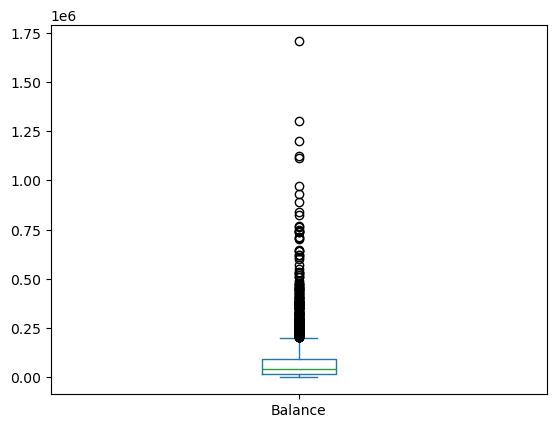

In [15]:
df["Balance"].plot(kind='box')

In [16]:
df['Balance'].describe()

count    3.999000e+03
mean     7.360133e+04
std      1.007757e+05
min      0.000000e+00
25%      1.852750e+04
50%      4.309700e+04
75%      9.240400e+04
max      1.704838e+06
Name: Balance, dtype: float64

In [33]:
df_log = df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Award?']].apply(lambda x: np.log1p(x))

In [34]:
scaler = MinMaxScaler()
X_scaled_log = scaler.fit_transform(df_log)

In [35]:
X_scaled_log_df = pd.DataFrame(X_scaled_log, columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
                                                      'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 
                                                      'Flight_trans_12', 'Award?'])

In [36]:
X_scaled_log_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?
0,0.713994,0.0,0.000000,0.0,0.0,0.413762,0.155209,0.000000,0.000000,0.0
1,0.687506,0.0,0.000000,0.0,0.0,0.430625,0.246000,0.000000,0.000000,0.0
2,0.740816,0.0,0.000000,0.0,0.0,0.666899,0.360383,0.000000,0.000000,0.0
3,0.669095,0.0,0.000000,0.0,0.0,0.498025,0.155209,0.000000,0.000000,0.0
4,0.800768,0.0,0.834044,0.0,0.0,0.855271,0.737999,0.739093,0.403471,1.0


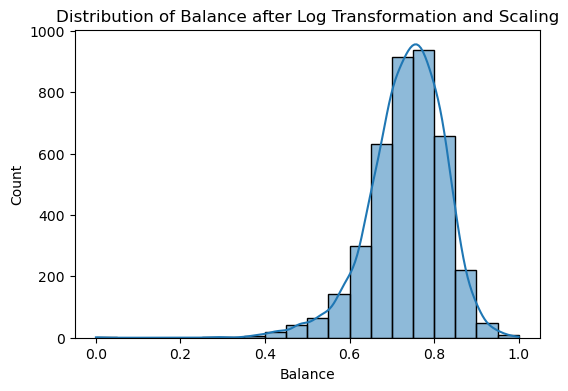

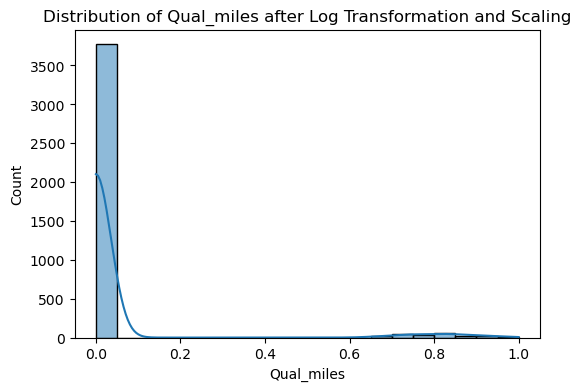

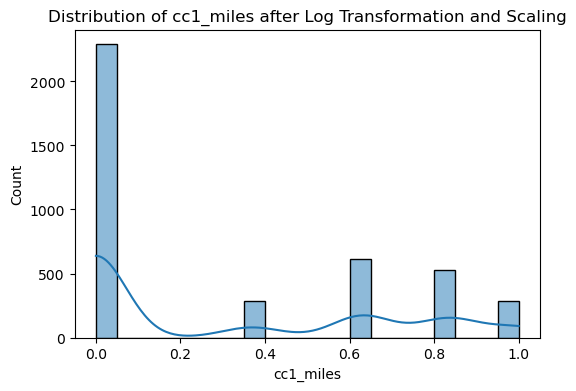

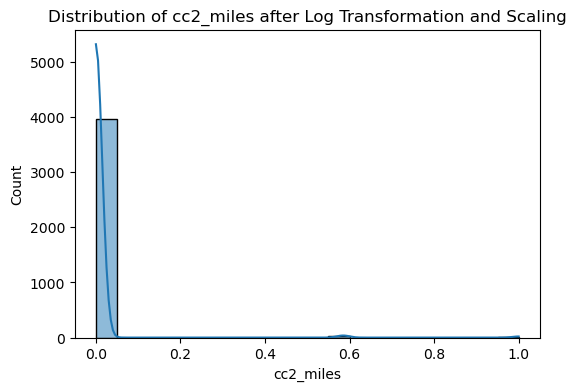

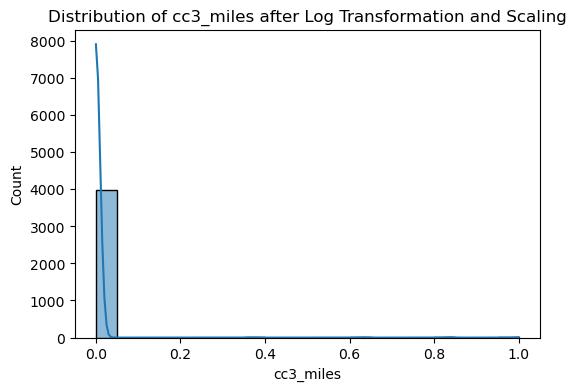

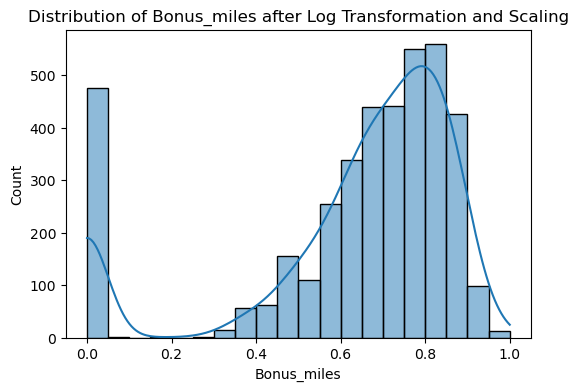

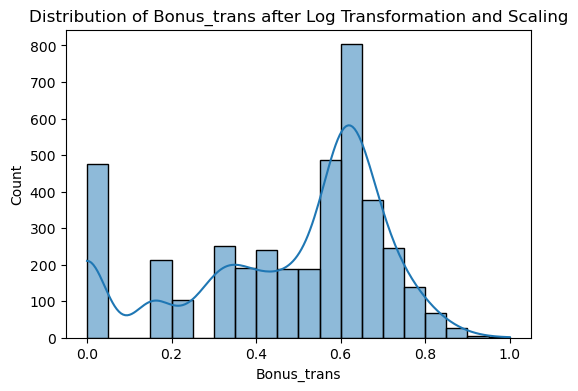

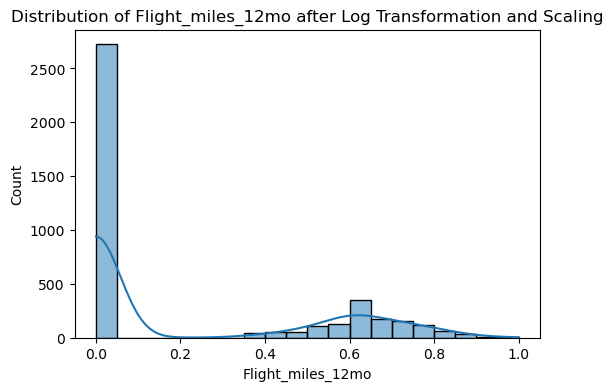

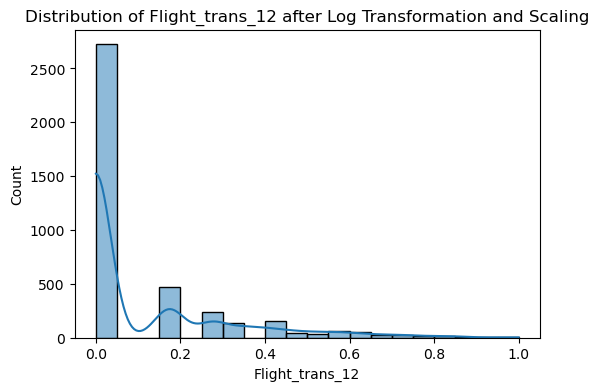

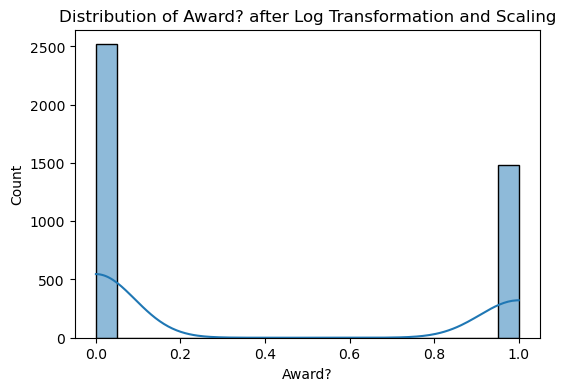

In [38]:
for column in X_scaled_log_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_scaled_log_df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column} after Log Transformation and Scaling')
    plt.show()

In [29]:
scaler = MinMaxScaler()
X = df[['Balance', 'Qual_miles', 'cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Award?']]
X_scaled = scaler.fit_transform(X)

In [27]:
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?
0,28143,0,1,1,1,174,1,0,0,0
1,19244,0,1,1,1,215,2,0,0,0
2,41354,0,1,1,1,4123,4,0,0,0
3,14776,0,1,1,1,500,1,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,1


In [30]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

C:\Users\viren\AppData\Local\Temp\ipykernel_4488\1453840138.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_scaled.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

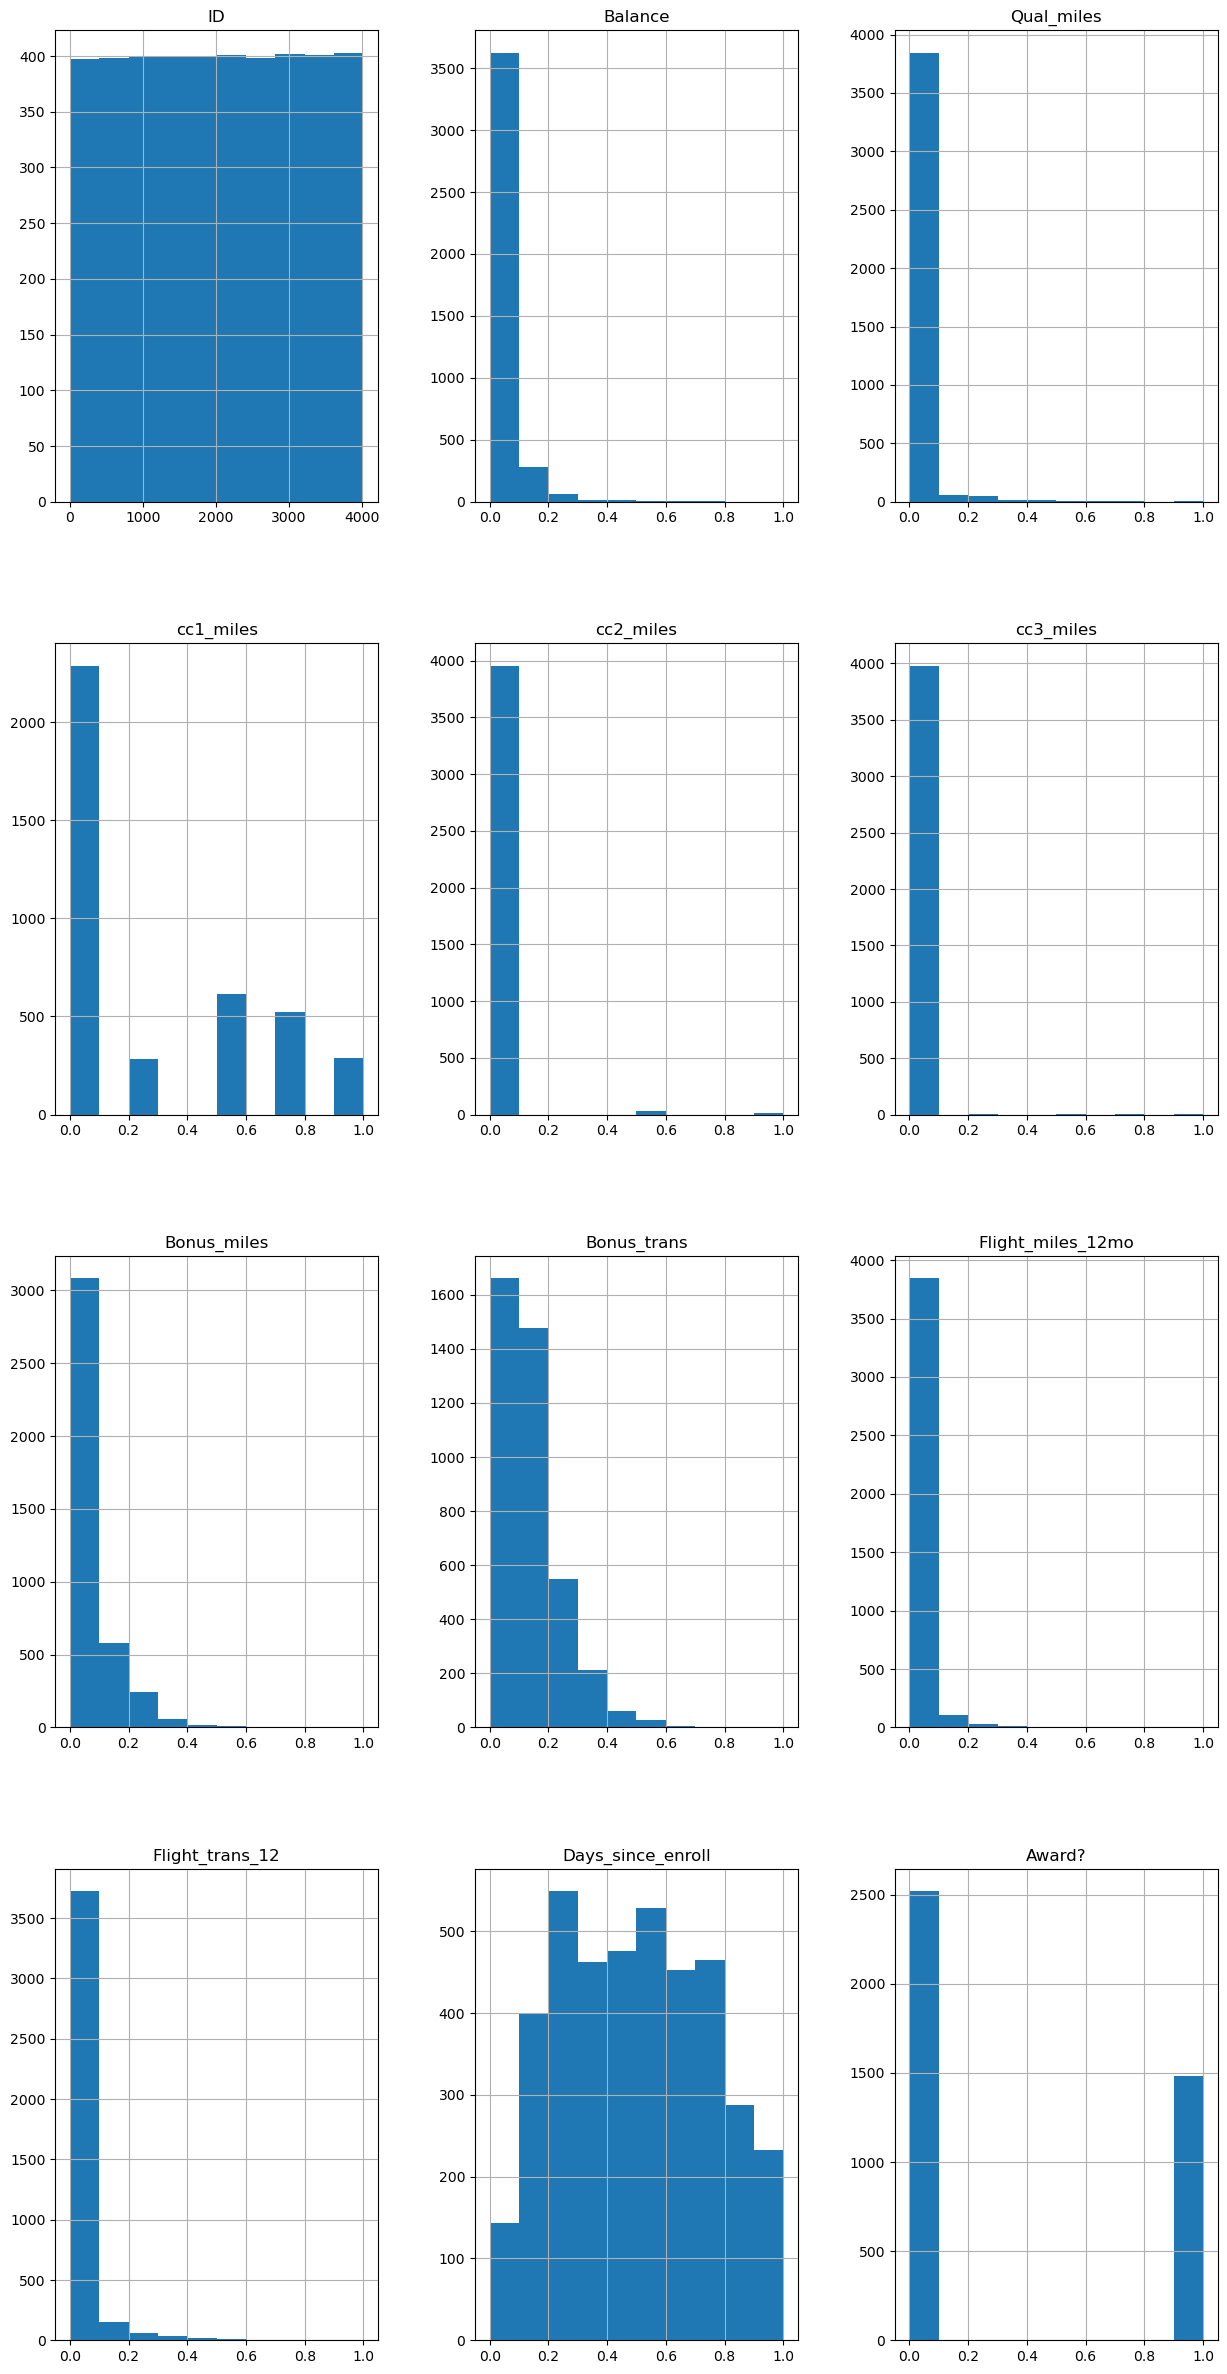

In [31]:
df_scaled.hist(figsize=(15,30))